<a href="https://colab.research.google.com/github/Aparna786711/Deep_learning/blob/main/Sentiment_analysis_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis with Keras

0 - Negative

1 - postitive





# Step 1 - Data Ingestion


In [1]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url1)


https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [2]:
print("a\tb")


a	b


In [3]:
import pandas as pd

df = pd.read_csv(url1, sep="\t")
df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


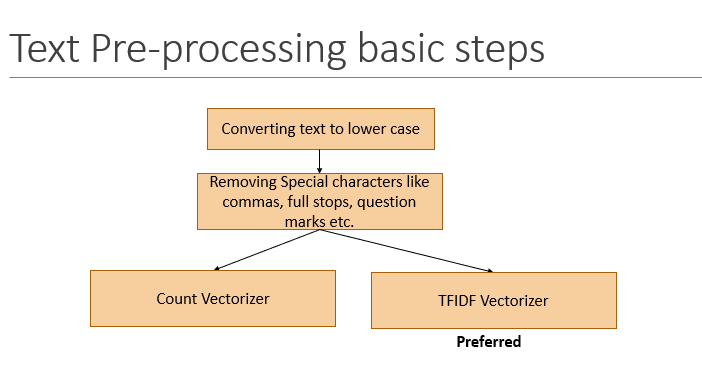

In [4]:
a = "Wow! This is AMAZING ..."
a.lower()


'wow! this is amazing ...'

In [5]:
import re
re.sub("[^a-z 0-9]", "",a.lower() )


'wow this is amazing '

In [6]:
import re

def preprocess_text(text: str) -> str:
  text = text.lower()
  text = re.sub("[^a-z 0-9]", "", text)
  return text.strip()


In [7]:
preprocess_text(a)


'wow this is amazing'

# Apply preprocessing on entire reviews


In [8]:
X = df["Review"].apply(preprocess_text)
X.head()


,Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


# Apply TFIDF Vectorizer


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X).toarray()
X_pre


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X_pre.shape


(1000, 2067)

# Dimensionality reduction with SVD


In [11]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300)
X_pre_red = svd.fit_transform(X_pre)
X_pre_red


array([[ 0.11457856,  0.19021733,  0.29860514, ...,  0.00154375,
        -0.03318026,  0.0103356 ],
       [ 0.20041515,  0.06219205,  0.10386266, ..., -0.04632744,
         0.0091005 , -0.07838783],
       [ 0.248602  , -0.05947126, -0.09197253, ..., -0.04120047,
         0.0083063 ,  0.00035917],
       ...,
       [ 0.25745938,  0.21354302, -0.25268859, ..., -0.01469787,
         0.01128824,  0.00162871],
       [ 0.21755074,  0.04422347, -0.07900022, ...,  0.0288264 ,
        -0.02964418, -0.02057435],
       [ 0.22278543,  0.02689928, -0.02221587, ..., -0.0467874 ,
        -0.02388274,  0.01197091]])

In [12]:
X_pre_red.shape


(1000, 300)

In [13]:
Y = df["Liked"]
Y.head()


,Liked
0,1
1,0
2,0
3,1
4,1


In [14]:
Y.value_counts()


,count
Liked,
1,500
0,500


# Train test split


In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre_red, Y, test_size=0.2, random_state=42
)


In [16]:
xtrain


array([[ 0.22714971, -0.1355275 , -0.05020054, ...,  0.08121893,
        -0.03459652,  0.01863612],
       [ 0.04699212,  0.0134224 ,  0.03451729, ..., -0.06128287,
        -0.04446584, -0.02670387],
       [ 0.19705026, -0.13148615, -0.08873096, ..., -0.01290589,
         0.00832071, -0.01699185],
       ...,
       [ 0.28454308,  0.11308598,  0.31554383, ..., -0.03603861,
         0.00063147, -0.00182862],
       [ 0.16594076, -0.07105197, -0.05824827, ..., -0.01020268,
        -0.03739244,  0.00241143],
       [ 0.17456908,  0.04421883,  0.01479548, ..., -0.05297936,
         0.00999489, -0.01079658]])

In [17]:
ytrain.head()


,Liked
29,0
535,1
695,0
557,0
836,1


In [18]:
xtest

array([[ 0.07691892,  0.13494159, -0.07038308, ..., -0.00434253,
         0.01419345,  0.00247661],
       [ 0.254266  , -0.07500539, -0.03373471, ...,  0.00454916,
         0.00783554,  0.01098438],
       [ 0.26574114,  0.01069196,  0.0962324 , ...,  0.00477967,
        -0.03319682,  0.00314721],
       ...,
       [ 0.14916885,  0.16649991,  0.2207663 , ...,  0.0040219 ,
        -0.00037876, -0.00376675],
       [ 0.14640626,  0.21286945, -0.21691329, ...,  0.02261386,
        -0.02120771,  0.00098011],
       [ 0.32089175, -0.02481936,  0.01883727, ...,  0.02639099,
        -0.00196296,  0.00411586]])

In [19]:
ytest.head()


,Liked
521,1
737,1
740,1
660,1
411,1


In [20]:
xtrain.shape


(800, 300)

In [21]:
xtrain.shape[1]


300

# Start building neural network


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


In [23]:
model = Sequential(
    layers = [
        Input(shape=(xtrain.shape[1],)),
        Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ]
)


In [24]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [26]:
es = EarlyStopping(patience=10, restore_best_weights=True)


In [27]:
hist = model.fit(xtrain, ytrain, validation_split=0.1, epochs=100, callbacks=[es])


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - accuracy: 0.4970 - loss: 3.0530 - val_accuracy: 0.4375 - val_loss: 2.2828
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5412 - loss: 2.0839 - val_accuracy: 0.4500 - val_loss: 1.6003
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5740 - loss: 1.4805 - val_accuracy: 0.4875 - val_loss: 1.1970
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5990 - loss: 1.1262 - val_accuracy: 0.4375 - val_loss: 0.9711
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6247 - loss: 0.9255 - val_accuracy: 0.5250 - val_loss: 0.8448
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6488 - loss: 0.8119 - val_accuracy: 0.6500 - val_loss: 0.7745
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7429 - loss: 0.7513 - val_accuracy: 0.6875 - val_loss: 0.7364
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7789 - loss: 0.7112 - val_accuracy: 0

# Plot the learning curve


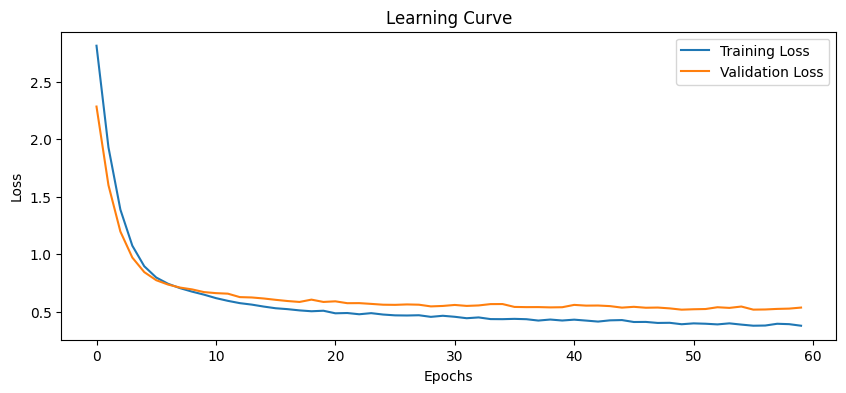

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()


# Evalutate model


In [29]:
model.evaluate(xtrain, ytrain)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9613 - loss: 0.3662 


[0.38202229142189026, 0.9474999904632568]

In [30]:
model.evaluate(xtest, ytest)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8000 - loss: 0.6619


[0.6463620662689209, 0.7850000262260437]

In [31]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.0681259 ],
       [0.9522139 ],
       [0.03134944],
       [0.07398735],
       [0.9782568 ]], dtype=float32)

In [32]:
ypred_train = (yprob_train >= 0.5).astype(int).flatten()
ypred_train[0:5]


array([0, 1, 0, 0, 1])

In [33]:
ytrain.head()


,Liked
29,0
535,1
695,0
557,0
836,1


In [34]:
yprob_test = model.predict(xtest)
yprob_test[0:5]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.3814937 ],
       [0.96592695],
       [0.9843162 ],
       [0.9818872 ],
       [0.63005793]], dtype=float32)

In [35]:
ypred_test = (yprob_test >= 0.5).astype(int).flatten()
ypred_test[0:5]


array([0, 1, 1, 1, 1])

In [36]:
ytest.head()


,Liked
521,1
737,1
740,1
660,1
411,1


# Save the objects
tfidf, svd, model



In [37]:
import joblib
joblib.dump(tfidf, "tfidf.joblib")


['tfidf.joblib']

In [38]:
joblib.dump(svd, "svd.joblib")


['svd.joblib']

In [39]:
model.save("sentiment_model.keras")


# Loading the files

In [40]:
tfidf = joblib.load("tfidf.joblib")
tfidf


TfidfVectorizer()

In [41]:
svd = joblib.load("svd.joblib")
svd


TruncatedSVD(n_components=300)

In [42]:
from keras.models import load_model

model = load_model("sentiment_model.keras")
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)

# Out of sample prediction


In [43]:
def analyse_sentiment(model, tfidf, svd):
  text = input("Please write the review : ")
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  yprob = model.predict(text_pre_red)
  if yprob >= 0.5:
    print("Positive sentiment")
    ypred = 1
  else:
    print("Negative sentiment")
    ypred = 0
  return ypred, yprob

In [46]:
analyse_sentiment(model, tfidf, svd)


Please write the review : Amazing Restaurant! really liked the service..
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Positive sentiment


(1, array([[0.9775474]], dtype=float32))

In [47]:
analyse_sentiment(model, tfidf, svd)


Please write the review : Didnt like taste , the service was too slow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Negative sentiment


(0, array([[0.04399063]], dtype=float32))

In [48]:
analyse_sentiment(model, tfidf, svd)


Please write the review : Wow!... This book i read was really good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Positive sentiment


(1, array([[0.90104586]], dtype=float32))

In [49]:
analyse_sentiment(model, tfidf, svd)


Please write the review : The service was ok, Average restaurant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Positive sentiment


(1, array([[0.6397127]], dtype=float32))